In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [199]:
# Ok... Now it HAS to work

def T(z):
    p = w / (2 * kappa)
    q = np.sqrt(w**2 + 4 * kappa * gamma) / (2 * kappa)
    
    A = (T_b - T_0) / ((p - q) * np.exp(-(p + q) * z_m) - (p + q) * np.exp(-(p - q) * z_m) \
                       - kappa / w * (p**2 - q**2) * (1 - np.exp(- w / kappa * (z_b - z_m))) \
                       * (np.exp(-(p + q) * z_m) - np.exp(-(p - q) * z_m)))
    
    C = A * (p**2 - q**2) * kappa / w * (np.exp(-(p + q) * z_m) - np.exp(-(p - q) * z_m)) * np.exp(w / kappa * z_m)
    
    if z > - z_m:
        return T_0 + A * ((p - q) * np.exp((p + q) * z) - (p + q) * np.exp((p - q) * z))
    
    else:
        return T_b + C * (np.exp(w / kappa * z) - np.exp(- w / kappa * z_b))

In [219]:
kappa = 1e-5 # units: m^2/s
w = 1e-7 # units m/s
gamma = 1/(365 * 3 * 86400) # units /s
T_0 = 18 # temperature relaxed back to
T_b = 6

z_m = 30.0
z_b = 1000
z = np.linspace(-z_b, 0, 101)

vT = np.vectorize(T)
temp = vT(z)

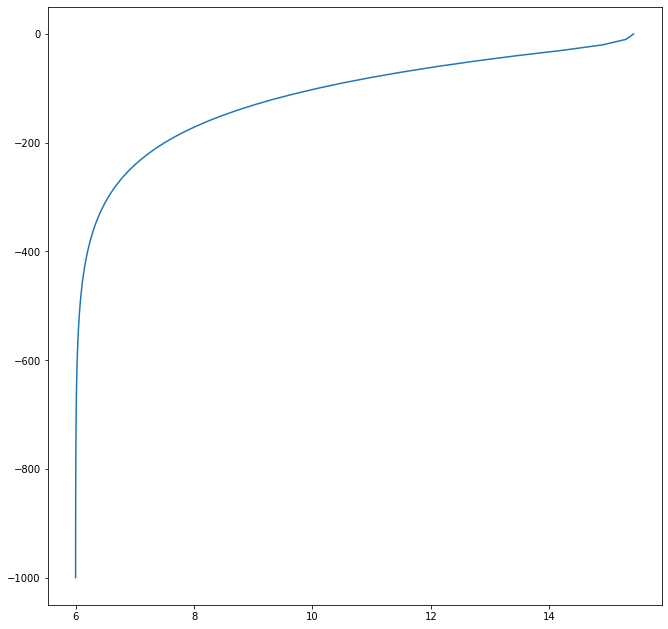

In [220]:
plt.figure(figsize=(11, 11))
plt.plot(temp, z)
#plt.gca().invert_yaxis()
#plt.gca().invert_xaxis()